In [1]:
import numpy as npp
import minpy.numpy as np
from minpy.nn import layers
from minpy.nn.model import ModelBase
from solver import Solver
import matplotlib.pyplot as plt
import minpy
minpy.set_global_policy("only_numpy")
import cPickle
from VanillaRNN import vanillaRNN
from SimRat import SimRat
from trialGenerator import trialGenerator
from dataProcessFunctions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [12]:
N=10
generator = trialGenerator(N)
block = 30

In [13]:
trainX,trainY = generator.getSequence(length = 10000, mode="alternative",p2a=0.5, block_size = block)
valX, valY = generator.getSequence(length = 1000, mode="alternative",p2a=0.5, block_size = block)
testX, testY = generator.getSequence(length = 1000, mode = "test", block_size = block, std=5)

(Iteration 1 / 50) loss: 184.624498
(Epoch 1 / 5) train acc: 0.6329, val_acc: 0.636, time: 6.48223400116.
(Iteration 11 / 50) loss: 132.307771
(Epoch 2 / 5) train acc: 0.728, val_acc: 0.73, time: 6.12141108513.
(Iteration 21 / 50) loss: 106.198556
(Epoch 3 / 5) train acc: 0.7404, val_acc: 0.742, time: 6.15387415886.
(Iteration 31 / 50) loss: 81.365127
(Epoch 4 / 5) train acc: 0.7404, val_acc: 0.742, time: 6.16647386551.
(Iteration 41 / 50) loss: 58.976530
(Epoch 5 / 5) train acc: 0.694, val_acc: 0.703, time: 6.06034898758.


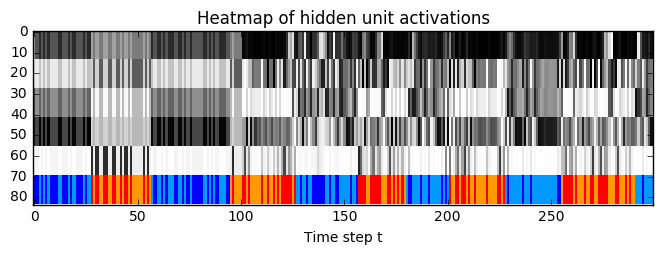

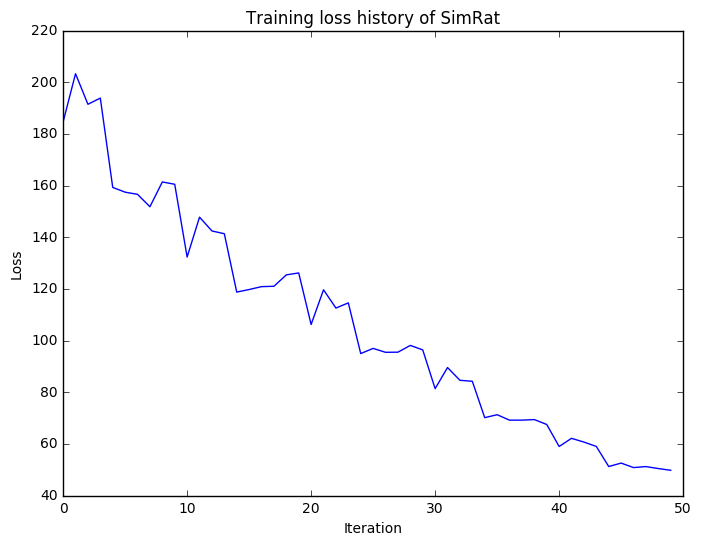

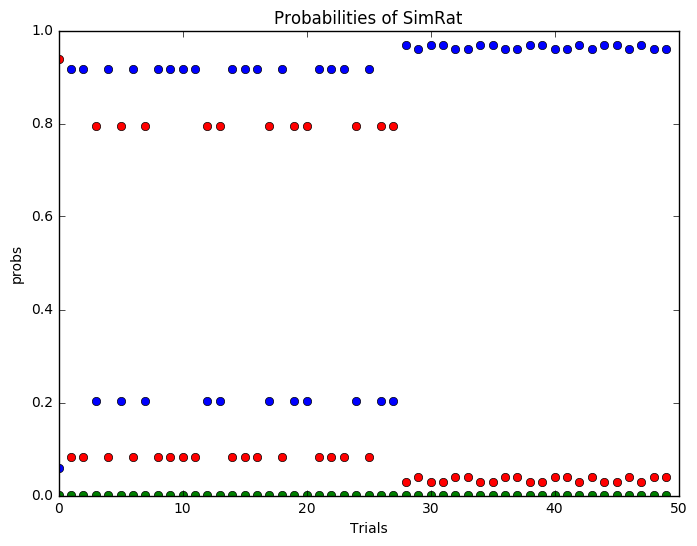

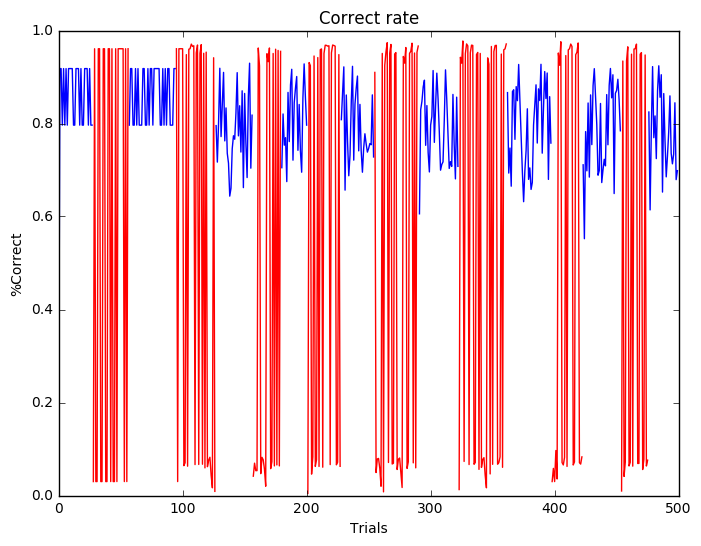

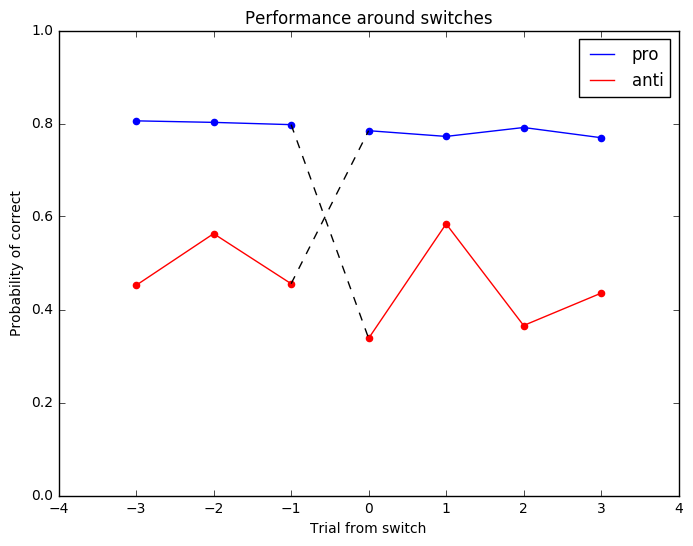

(Iteration 1 / 50) loss: 81.365127
(Epoch 1 / 5) train acc: 0.7405, val_acc: 0.742, time: 6.30278110504.
(Iteration 11 / 50) loss: 59.129373
(Epoch 2 / 5) train acc: 0.7334, val_acc: 0.733, time: 6.29210519791.
(Iteration 21 / 50) loss: 44.727063
(Epoch 3 / 5) train acc: 0.8549, val_acc: 0.864, time: 6.48332715034.
(Iteration 31 / 50) loss: 39.507652
(Epoch 4 / 5) train acc: 0.9422, val_acc: 0.947, time: 6.82219696045.
(Iteration 41 / 50) loss: 34.652929
(Epoch 5 / 5) train acc: 0.9446, val_acc: 0.954, time: 7.59497785568.


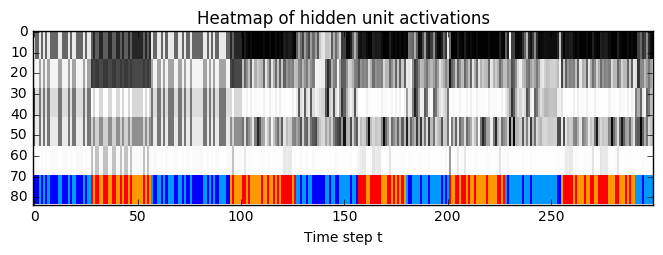

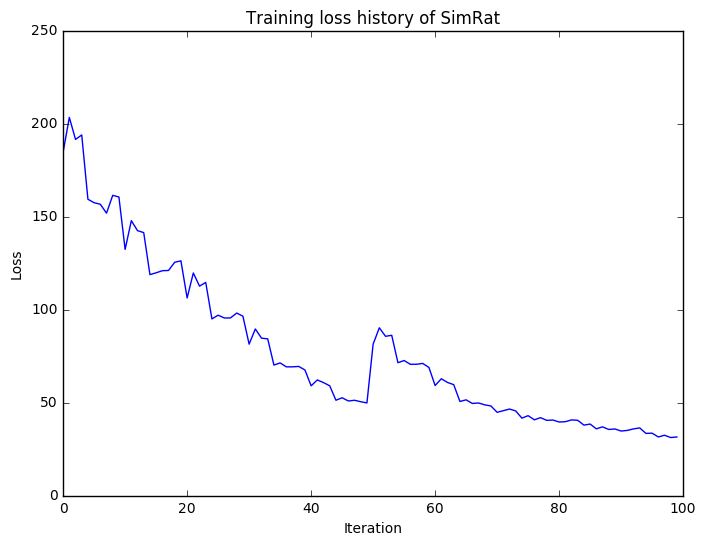

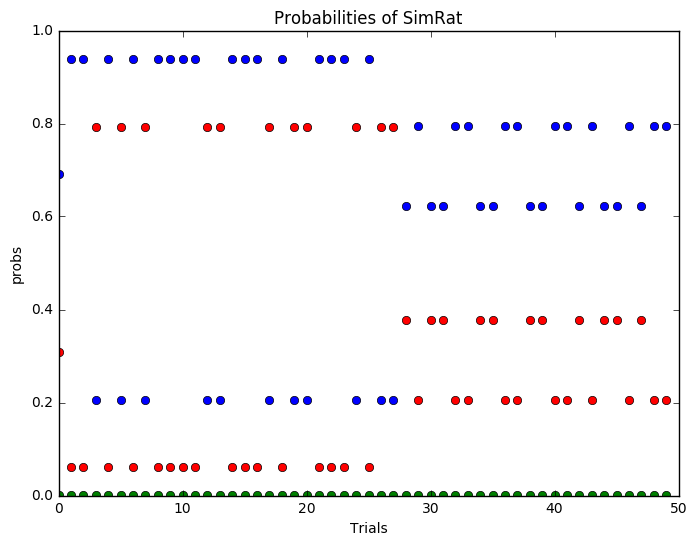

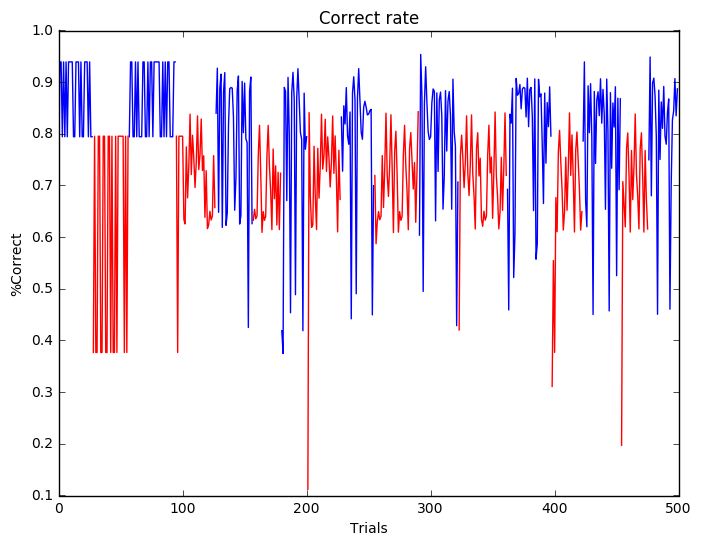

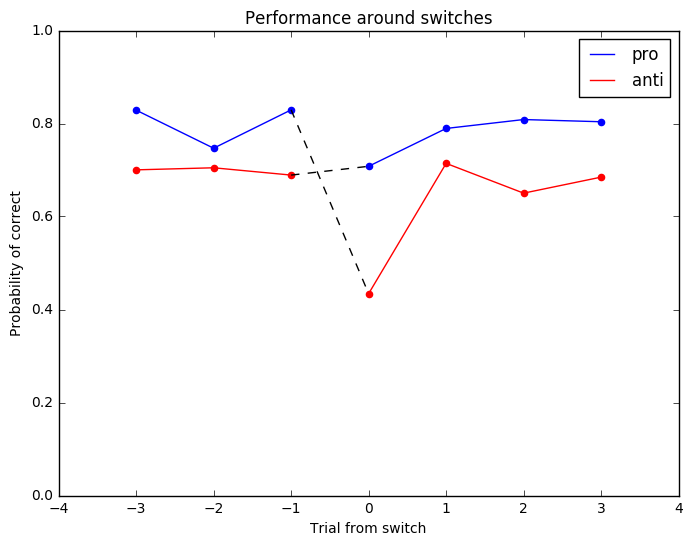

(Iteration 1 / 50) loss: 30.186051
(Epoch 1 / 5) train acc: 0.9433, val_acc: 0.952, time: 7.99601006508.
(Iteration 11 / 50) loss: 26.710341
(Epoch 2 / 5) train acc: 0.9436, val_acc: 0.951, time: 8.22595095634.
(Iteration 21 / 50) loss: 23.653191
(Epoch 3 / 5) train acc: 0.9727, val_acc: 0.973, time: 7.89812397957.
(Iteration 31 / 50) loss: 20.906216
(Epoch 4 / 5) train acc: 0.9807, val_acc: 0.981, time: 7.79902791977.
(Iteration 41 / 50) loss: 18.220033
(Epoch 5 / 5) train acc: 0.997, val_acc: 0.995, time: 7.48800182343.


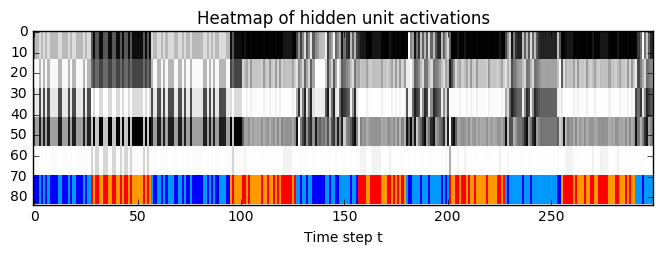

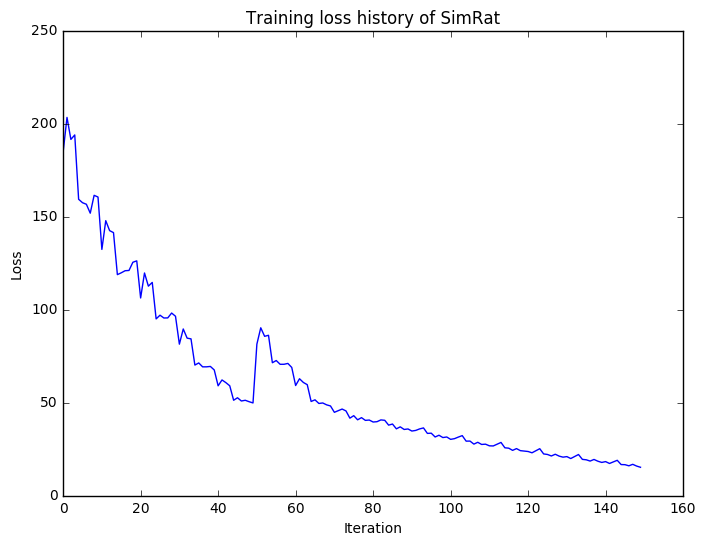

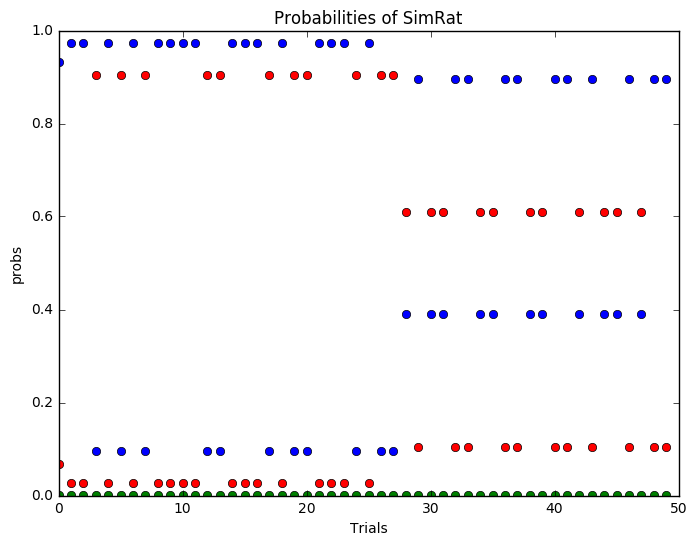

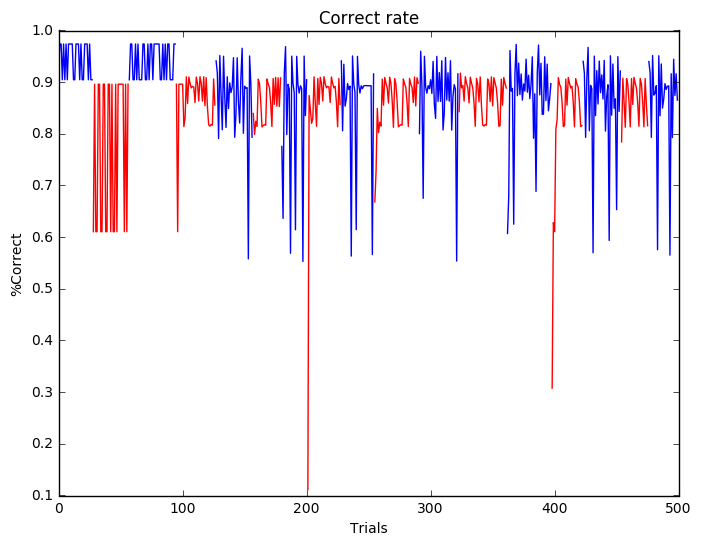

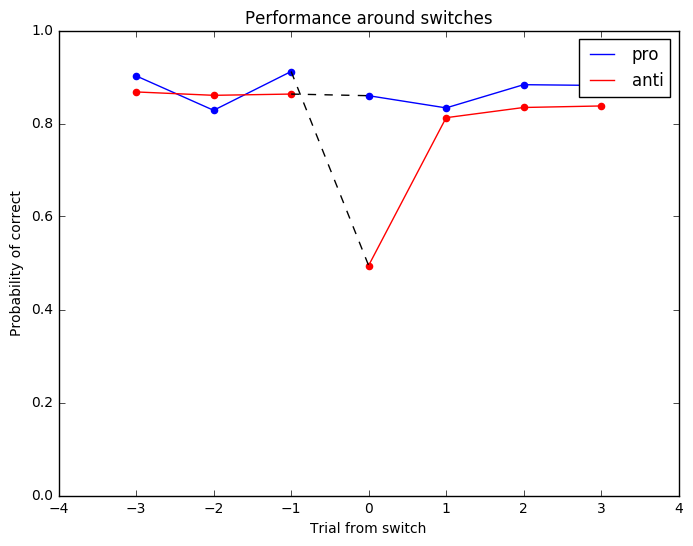

In [15]:
learning_rate = 1e-2
RNN = vanillaRNN(N=N, hidden_dim=5, reg=0, p = 1, decay_rate = 1, noise_factor = 0)
solver = Solver(RNN,
                trainX, trainY,
                valX, valY,
                num_epochs=5,
                batch_length = 100,
                init_rule='xavier',
                update_rule='adam',
                optim_config={
                      'learning_rate': learning_rate,
                    },
                lr_decay = 1,
                verbose=True,
               )
solver.init()
#solver.load_params(weights)

parameters = []
for i in range(3):
    solver.change_settings(learning_rate=learning_rate/2)
    solver.train()
    
    trial_window = 3
    rat = SimRat(RNN,trial_window=trial_window)
    probs = rat.predict(testX,testY)
    heatmap(rat.RNN.h.asnumpy(),start=0,end=300)
    ratname = 'SimRat'
    loss_history(solver, ratname) 
    sample_probabilities(probs, ratname, start=0,end = 50) 
    sample_correct_rate(rat, start=0, end = 500)
    #sample_correct_rate_new(rat, start=0, end = 1000) 
    p2a, a2p = rat.p2a_prob, rat.a2p_prob
    p2a_left, a2p_left = rat.p2a_left_prob, rat.a2p_left_prob
    p2a_right, a2p_right = rat.p2a_right_prob, rat.a2p_right_prob

    draw_3d(p2a, a2p, trial_window = trial_window)
    #draw_3d_new(p2a_left, p2a_right, a2p_left, a2p_right, trial_window = trial_window)

    #parallel_coordinate(rat.RNN.h.asnumpy(), start = 0, end = 1000)
    #phasePlane(rat.RNN.h.asnumpy(),dim1=0,dim2=1,start=0,end=1000)

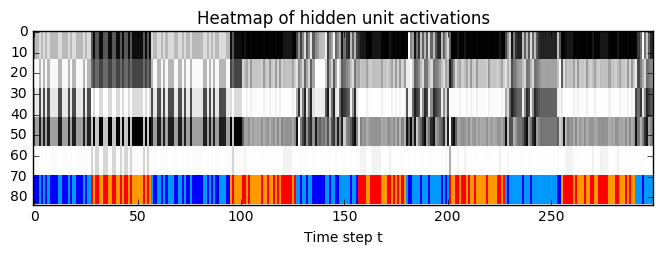

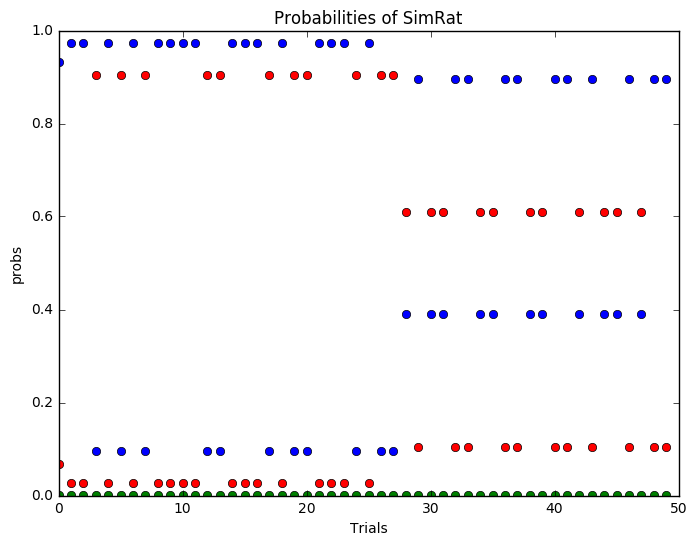

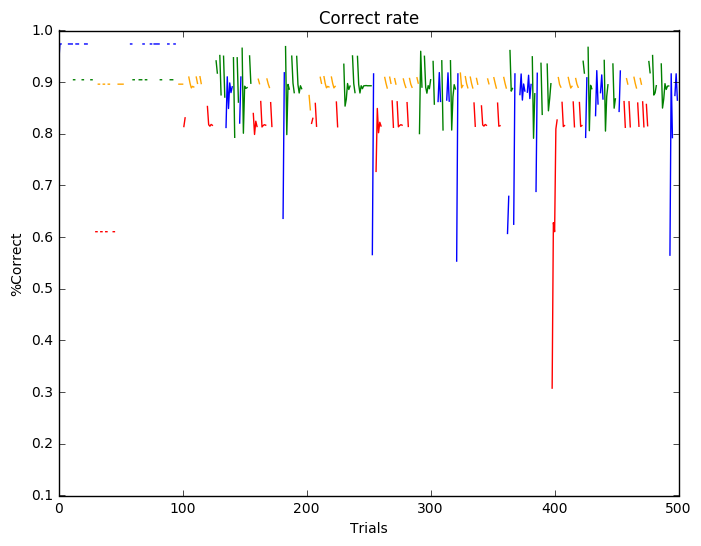

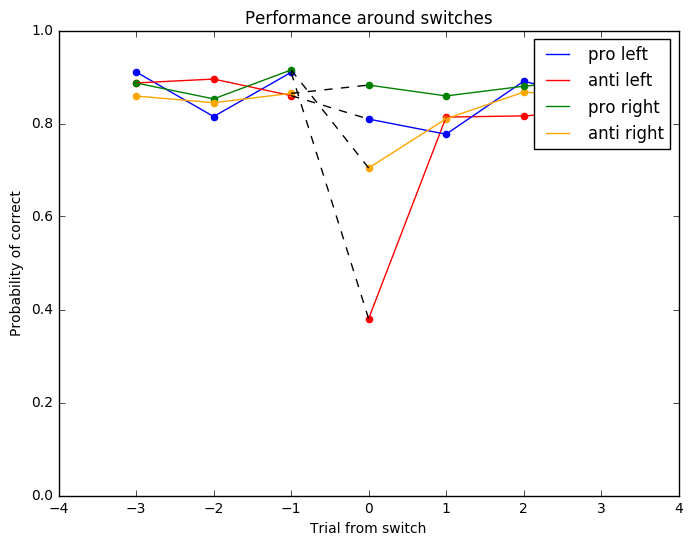

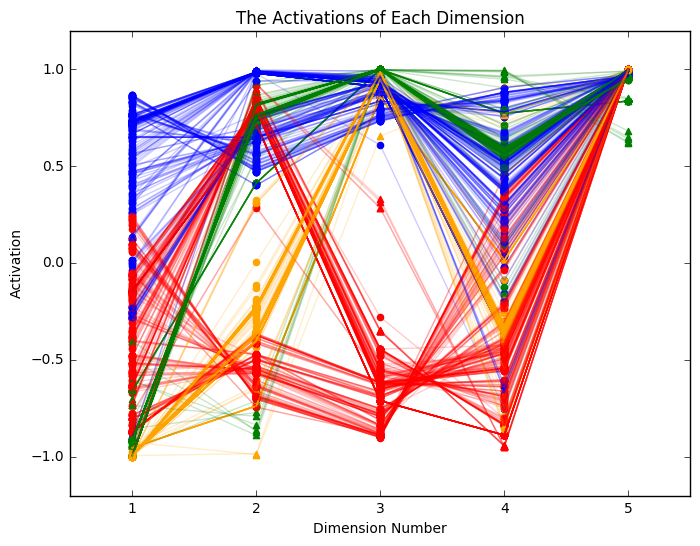

In [16]:
trial_window = 3
rat = SimRat(RNN,trial_window=trial_window)
probs = rat.predict(testX,testY)
heatmap(rat.RNN.h.asnumpy(),start=0,end=300)
ratname = 'SimRat' 
sample_probabilities(probs, ratname, start=0,end = 50) 
#sample_correct_rate(rat, start=0, end = 1000)
sample_correct_rate_new(rat, start=0, end = 500) 

p2a, a2p = rat.p2a_prob, rat.a2p_prob
p2a_left, a2p_left = rat.p2a_left_prob, rat.a2p_left_prob
p2a_right, a2p_right = rat.p2a_right_prob, rat.a2p_right_prob

#draw_3d(p2a, a2p, trial_window = trial_window)
draw_3d_new(p2a_left, p2a_right, a2p_left, a2p_right, trial_window = trial_window)
#phasePlane(rat.RNN.h.asnumpy(),dim1=0,dim2=1,start=0,end=5000, trajectory = False, 
#           scatter = False, mean=True, ylim = (-1.5,1.5), xlim=(-1.5,1.5))
parallel_coordinate(rat.RNN.h.asnumpy(), start = 0, end = 1000)


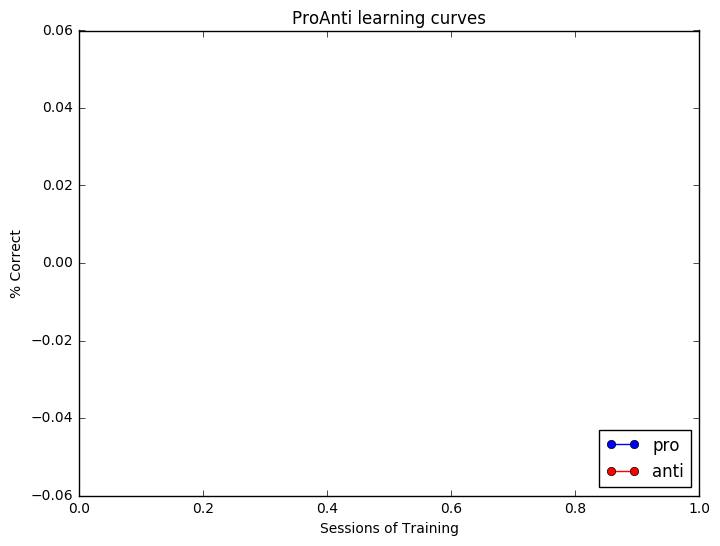

In [17]:
rat.computeLearningCurve(solver.inputOutputHistory)
learningCurve(rat.pro_rate, rat.anti_rate)

In [ ]:
for k, v in RNN.params.iteritems():
    print k,v